# Sentiment analysis of Twitter tweets

Sentiment analysis of tweets include the following process:
* Reading required libraries.
* Providing consumer key and access token keys and connecting to twitter api using tweepy.
* Cleaning tweets and priniting them.
* Using textblob to find polarity of tweets and plotting histogram for it.


## Importing libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

## Providing consumer_key and access tokens

In [2]:
consumer_key= 'NVW0j9jNOaMlx56hivWeIUHd6'
consumer_secret= 'MwAL4ph3ZKxqYaHSXRlTW2aITx7vfEnR53SeW9vqtEJHS5TcB7'
access_token= '1348610316549152773-U3w86MBTngMrFXvG9On9CSk6JDFsZd'
access_token_secret= 'XqC7wJfky2vq8i3spW6tIuWyBdn9fwD8yxq2waGoaCrDg'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Here tweepy is used for accessing twitter api.

### Creating new function 'remove_url' for removing url from tweets.

In [4]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

Create a custom search term with hashtag "Lockdown" and define the number of tweets we need which is 500 and also specifying the dates which we have chosen as 19 dec as the lockdown was imposed from 1 dec 2020 in UK recently,from when we need the tweets and then removing the url from the tweets with help of our remove_url function.

In [5]:
search_term = "#Lockdown"
new_term = search_term + " -filter:retweets"
new_term

tweets = tw.Cursor(api.search,
                   q=new_term,
                   lang="en",
                   since="2020-10-1").items(500)

In [6]:
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [7]:
len(tweets_no_urls)

500

Printing the length of tweets to check howmany tweets has been extracted specify tweets which showcases not only about how people feel about lockdown but also some advertisments which have used #covidlockdown hashtag. We have used filter:retweets so that retweets are not included in the list of 500 tweets.

## Using Textblob to get polarity value of tweets

Create textblob objects of the tweets

In [8]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.25,
 TextBlob("China is rushing to build a massive quarantine camp that can house more than 4000 people after an outbreak of"))

Create list of polarity values and tweet text

In [9]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.25,
 'China is rushing to build a massive quarantine camp that can house more than 4000 people after an outbreak of']

Creating dataframe sentiment_df for containing the polarity value and tweet text

In [10]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.250000,China is rushing to build a massive quarantine...
1,-0.400000,Sandras losing it on todays Secret Fictitious ...
2,0.136364,Dinger New Rip 2W1B 062 You Should Have An Onl...
3,0.500000,More destruction the lockdown crowd must ackno...
4,0.500000,A lovely hiding place lockdown LensAreLive The...
...,...,...
495,0.150000,Tanks and concrete barriers block the streets ...
496,0.000000,Anyone else fallen into the stay home browse o...
497,0.000000,For those of us looking for living roomfriendl...
498,0.650000,storywhispers I would love to win to help me g...


## Plotting polarity value of tweets and their frequency

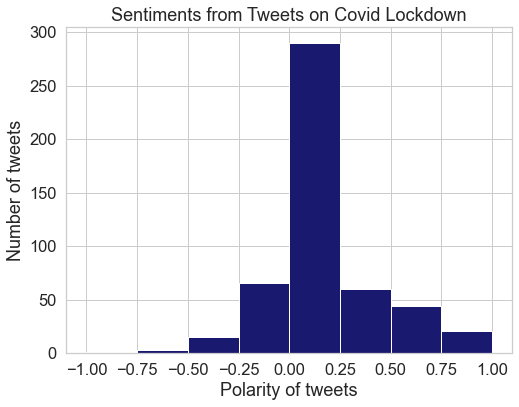

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="midnightblue")
plt.xlabel("Polarity of tweets")
plt.ylabel("Number of tweets")
plt.title("Sentiments from Tweets on Covid Lockdown")
plt.show()

The above plot depicts the polarity value of tweets and number of tweets having that polarity value with hashtag #Lockdown. polarity value above 0 depicts positive response and below 0 or negative depicts a negative response. Following are the observations that are made based on tweets:
* Majority of tweets are positive (almost 400), most of them tend to be around 0 which means neutral.
* Some negative emotions are depicted having negative polarity mostly these are done by restaurant handlers who are majorly affected by lockdown restrictions.
* Although we have used 500 tweets but it is not a good representation of population and thus cannot be used to judge the overall emotion of people towards covid lockdown. 
* The only recommendation that could be given with such less amount of tweets would be imposing of lockdown during festive periods although a smart move, it must be avoided. For any other recommendation the number of tweets that would be required would be more in order to understand general emotion of people towards the lockdown imposed due to covid.  